PRIMER ENTREGA

En esta primer entrega presentaré el set de datos elegido para el proyecto final, que es un registro de accidentes viales de la Ciudad de Buenos Aires (desde ahora CABA), descargado de la pagina oficial del Gobierno de la Ciudad.

En este primer analisis veremos los detalles de este dataset, como por ejemplo el periodo de tiempo que abarca, los datos geograficos que nos dan, con que detalles del accidente contamos, etc. 

La motivación de esta elección es el estudio de casos reales y cercanos a mi en cierto punto (ya que vivo cerca de la ciudad de buenos aires y trabajo ahí) que me permitirá plantear preguntas interesantes y sacar conclusiones usando mi conocimiento de la Ciudad y sus conductores/transeuntes.

La audiencia que se vería beneficiada con este analisis es el ciudadano de CABA, que está expuesto a los infractores y el peligro que estos suponen, ya que, como opinión personal, los conductores y peatones de CABA tienen una tendencia general al desinteres hacia el projimo en las circunstancias de la vialidad.

Las preguntas que haré a lo largo de la entrega se basaran en el estudio del set de datos, pero como primer objetivo a tener en cuenta, quiero reducir la cantidad de siniestros en la Ciudad de Buenos Aires, con medidas que utilicen la información presente en los datos del dataset, para esto asumo que me contrata el Gobierno de la Ciudad. 

IMPORTO LAS LIBRERIAS A UTILIZAR.

LUEGO IMPORTO Y CARGO EL SET DE DATOS EN UN DATAFRAME LLAMADO "sin_df".

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
siniestros = 'victimas-siniestros.csv'
sin_df = pd.read_csv(siniestros)
sin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   causa                         33234 non-null  object 
 1   rol                           32899 non-null  object 
 2   tipo                          32134 non-null  object 
 3   sexo                          33037 non-null  object 
 4   edad                          32675 non-null  float64
 5   mes                           33197 non-null  float64
 6   periodo                       33234 non-null  int64  
 7   fecha                         33173 non-null  object 
 8   hora                          33217 non-null  object 
 9   lugar_hecho                   29518 non-null  object 
 10  direccion_normalizada         32469 non-null  object 
 11  tipo_calle                    33234 non-null  object 
 12  direccion_normalizada_arcgis  32462 non-null  object 
 13  c

C:\Users\Seguridad\AppData\Local\Temp\ipykernel_1856\2868349731.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sin_df = pd.read_csv(siniestros)


Tengo 29 columnas en el dataset, en esta entrega no haré la limpieza de las columnas, pero si una exploración para entender cuales son las mas importantes y cuales son redundantes.

In [4]:
datos_sin = sin_df[['causa','rol','tipo','cantidad_victimas','participantes_victimas','participantes_acusados','tipo_calle','tipo_colision1']]
datos_pers = sin_df[['rol','sexo','edad']]
datos_fecha_geo = sin_df[['mes','periodo','fecha','hora','lugar_hecho','direccion_normalizada','direccion_normalizada_arcgis','calle1','altura','calle2','codigo_calle','codigo_cruce','geocodificacion','semestre','x','y','geom','comuna','geom_3857']]

El dataset me ofrece datos del siniestro, de la persona involucrada y de la fecha y ubicación del hecho. Divido estos datos en 3 dataframes para analizar estos y encontrar redundancias.

In [5]:
datos_sin.head(10)

,causa,rol,tipo,cantidad_victimas,participantes_victimas,participantes_acusados,tipo_calle,tipo_colision1
0,homicidio,conductor,moto,1,moto,automovil,calle,motovehiculo - vehiculo
1,homicidio,NaN,NaN,1,NaN,NaN,avenida,NaN
2,homicidio,peaton,peaton,1,peaton,"""transporte publico""",avenida,peaton - vehiculo
3,homicidio,NaN,NaN,1,NaN,NaN,calle,NaN
4,homicidio,pasajero,camion,1,camion,camion,avenida,vehiculo - vehiculo
5,homicidio,conductor,moto,1,moto,automovil,calle,motovehiculo - vehiculo
6,homicidio,conductor,moto,1,moto,automovil,avenida,motovehiculo - vehiculo
7,lesiones,pasajero,automovil,1,automovil,automovil,calle,vehiculo - vehiculo
8,homicidio,conductor,moto,1,moto,moto,avenida,motovehiculo - motovehiculo
9,homicidio,NaN,moto,1,moto,automovil,avenida,motovehiculo - vehiculo


In [6]:
datos_sin['causa'].value_counts()

lesiones     32795
homicidio      439
Name: causa, dtype: int64

En el dataframe con datos del siniestro veo, en principio, que todas las columnas son importantes y tienen información sensible no redundante. 
También puedo notar que los registros que tienen algúna columna con dato nulo, es muy probable que tengan otras columnas con nulos también (por ejemplo los registros del indice 1 y 3).

Por alguna razón que todavía no interpreto, los primeros registros tienen una gran cantidad de valores "homicidio" en la columna "causa", a pesar de que este valor aparezca solo 439 veces (mientras que el otro valor posible, "lesiones", aparece 32795 veces). Es posible que lo hayan cargado de forma no cronologica, esto lo confirmare estudiando los registros que involucran la fecha y localización.

In [7]:
datos_pers.head(10)

,rol,sexo,edad
0,conductor,NaN,NaN
1,NaN,NaN,NaN
2,peaton,femenino,NaN
3,NaN,NaN,NaN
4,pasajero,masculino,NaN
5,conductor,NaN,NaN
6,conductor,masculino,18.0
7,pasajero,masculino,26.0
8,conductor,masculino,24.0
9,NaN,masculino,NaN


In [8]:
datos_pers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rol     32899 non-null  object 
 1   sexo    33037 non-null  object 
 2   edad    32675 non-null  float64
dtypes: float64(1), object(2)
memory usage: 779.0+ KB


En este caso veo muchos datos nulos a primera vista, pero usando la función info puedo notar que es un problema en el orden de la carga de los registros, ya que las 3 columnas tienen la mayoria de sus datos no nulos, como pude ver arriba. Teniendo en cuenta lo notado previamente sobre la gran carga de registros en los que hubo fallecidos al principio del set de datos, esta particularidad de la columna edad con datos nulos no parece ser una coincidencia, sino que en principio habría una carga con una mayor cantidad de datos nulos en estos casos en los que el participante del siniestro fallecio (y estos parecen estar en los primeros registros del set de datos) 

In [9]:
datos_pers.sample(5)

,rol,sexo,edad
2611,conductor,masculino,26.0
5246,peaton,masculino,78.0
12485,conductor,masculino,32.0
10641,conductor,masculino,54.0
32795,conductor,femenino,52.0


Con el metodo sample confirmo la sospecha expuesta arriba (ya que no obtengo nulos).

In [10]:
datos_fecha_geo.sample(5)

,mes,periodo,fecha,hora,lugar_hecho,direccion_normalizada,direccion_normalizada_arcgis,calle1,altura,calle2,codigo_calle,codigo_cruce,geocodificacion,semestre,x,y,geom,comuna,geom_3857
15465,11.0,2017,11/15/2017,13:45:00,del barco centenera y fernandez de la cruz,"barco centenera del y fernandez de la cruz, f....","barco centenera del & fernandez de la cruz, f....",barco centenera del,NaN,"fernandez de la cruz, f., gral. av.",NaN,NaN,point(103196.941889901 97940.8905855695),2,-58.428428,-34.647827,0101000020E61000009DB46BBED6364DC0E5F3B0FCEB52...,4.0,0101000020110F0000DD6CDEB9C7CF58C11A770E4D4E67...
18108,12.0,2015,12/15/2015,18:20:00,1831 avda directorio,directorio av. 1831,1831 directorio av.,directorio av.,1831.0,NaN,4078.0,0.0,POINT(100881.589225 99786.2610737),2,-58.453686,-34.631196,0101000020E6100000B5DB915E123A4DC04BA0560BCB50...,7.0,0101000020110F0000BC9CF3A086D258C1CA13B83CE962...
13063,12.0,2016,12-06-16,20:40:00,culpina & avda juan b alberdi,"culpina y alberdi, juan bautista av.","culpina & alberdi, juan bautista av.",culpina,NaN,"alberdi, juan bautista av.",3203.0,1033.0,POINT(99771.5293152657 99641.9719777226),2,-58.465792,-34.632497,0101000020E610000042DA7A0E9F3B4DC00C459BACF550...,7.0,0101000020110F000059530589D7D358C15E29AB3D4163...
987,10.0,2015,10-10-15,21:40:00,paseo colon y juan de garay,"paseo colon av. y garay, juan de av.","paseo colon av. & garay, juan de av.",paseo colon av.,NaN,"garay, juan de av.",17028.0,7026.0,POINT(108733.90625 100572.5390625),2,-58.368059,-34.624072,0101000020E61000001BB845911C2F4DC0FE9E3799E14F...,1.0,0101000020110F00004CD405A937C958C10FDD41580761...
3685,6.0,2016,6/15/2016,20:46:00,avda segurola & elpidio gonzalez,"segurola av. y gonzalez, elpidio","segurola av. & gonzalez, elpidio",segurola av.,NaN,"gonzalez, elpidio",20088.0,7065.0,POINT(96700.8852102942 100970.243717339),1,-58.499274,-34.620518,0101000020E610000063DBD435E83F4DC0C3E0A2256D4F...,10.0,0101000020110F00007CE125597BD758C1DEDB68F91660...


Acá tengo varias cosas para resaltar, primero, la columna fecha tiene dos posibles formatos para sus valores (DD/MM/AAAA y MM-DD-AA), debo normalizar esto para poder extraer el dia y usarlo como columna. Por otro lado, la geolocalización tiene muchas columnas redundantes (con información repetida en distintos formatos), por lo que hare una limpieza y eliminare las columnas que no aporten información. 

A CONTINUACIÓN VOY A EXPLORAR EL SET DE DATOS PARA TERMINAR DE ENTENDER COMO FUE LA CARGA DE DATOS Y LAS RELACIONES ENTRE LOS DATOS NULOS.

En primer lugar corroboro la relación entre el valor 'homicidio' de la columna 'causa' con los datos nulos e intento entender por que pareciera que estan distribuidos en los primeros registros del set de datos.

In [11]:
sin_df.loc[sin_df.causa == 'homicidio'].describe()

,edad,mes,periodo,altura,codigo_calle,codigo_cruce,semestre,x,y,cantidad_victimas,comuna
count,387.000000,439.000000,439.000000,73.000000,406.000000,316.000000,439.000000,435.000000,435.000000,439.000000,435.000000
mean,39.418605,6.808656,2015.970387,2949.315068,15682.714286,13387.132911,1.519362,-58.441096,-34.621098,1.086560,7.321839
std,19.601086,3.563490,0.817356,2562.321554,20794.019197,14447.084076,0.500195,0.046894,0.036720,0.326566,4.373923
min,1.000000,1.000000,2015.000000,30.000000,1006.000000,1014.000000,1.000000,-58.528953,-34.703799,1.000000,1.000000
25%,24.000000,4.000000,2015.000000,1211.000000,4056.000000,4077.250000,1.000000,-58.475866,-34.648065,1.000000,4.000000
50%,34.000000,7.000000,2016.000000,2186.000000,12107.000000,12107.000000,2.000000,-58.442734,-34.624472,1.000000,8.000000
75%,52.000000,10.000000,2017.000000,4386.000000,17118.500000,19048.000000,2.000000,-58.399077,-34.597962,1.000000,11.000000
max,100.000000,12.000000,2017.000000,15200.000000,99657.000000,99657.000000,2.000000,-58.358625,-34.534649,3.000000,15.000000


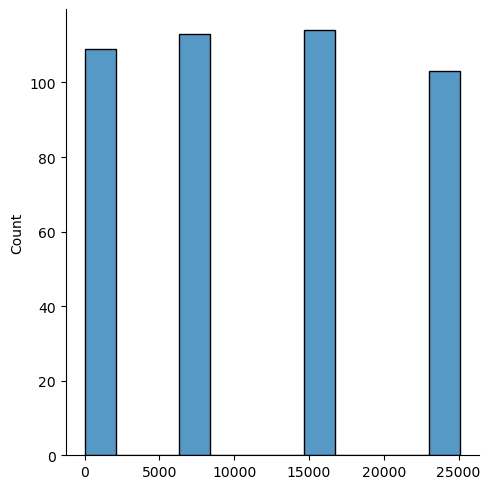

In [12]:
sns.displot(sin_df.loc[sin_df.causa == 'homicidio'].index)

Estudiando los indices de los registros que reportan fallecidos, puedo notar que cargaron todos estos registros juntos, no cronologicamente, en 4 oportunidades, por lo que voy a chequear si los valores nulos de estos registros tienen algun patrón

<AxesSubplot:>

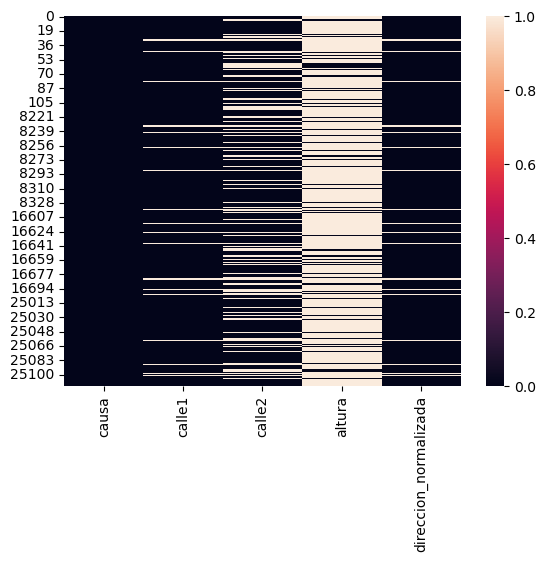

In [13]:
sns.heatmap(sin_df[['causa','calle1','calle2','altura','direccion_normalizada']].loc[sin_df.causa == 'homicidio'].isnull())

Puedo notar 2 cosas en principio, cuando la columna "calle2" es nula, mayormente, la columna "altura" no lo es y viseversa. Tambien noto que las filas en las que la columna "direccion_normalizada" tiene nulos, tambien son nulos las demas columnas estudiadas en el grafico. 

<AxesSubplot:>

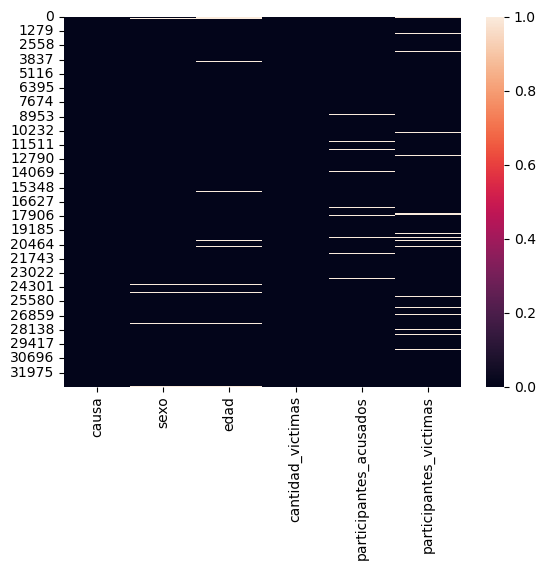

In [14]:
sns.heatmap(sin_df[['causa','sexo','edad','cantidad_victimas','participantes_acusados','participantes_victimas']].isnull())


En este caso, no hay patrones claros para estas columnas.

El siguiente punto a esclarecer es la ventana temporal exacta que abarca este set de datos, para eso voy a hacer una visualización en la cual también estudiaré la cantidad de siniestros por mes para el periodo registrado.

In [22]:
sin_df['cant'] = 1
g_anios = sin_df.groupby(['periodo','mes'])['cant'].sum().reset_index()

quince = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2015]
diesiseis = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2016]
diesisiete = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2017]
diesiocho = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2018]

quince.set_index('mes',inplace=True)
diesiseis.set_index('mes',inplace=True)
diesisiete.set_index('mes',inplace=True)
diesiocho.set_index('mes',inplace=True)

Text(0.5, 1.0, 'siniestros por mes en 2015, 2016 y 2017')

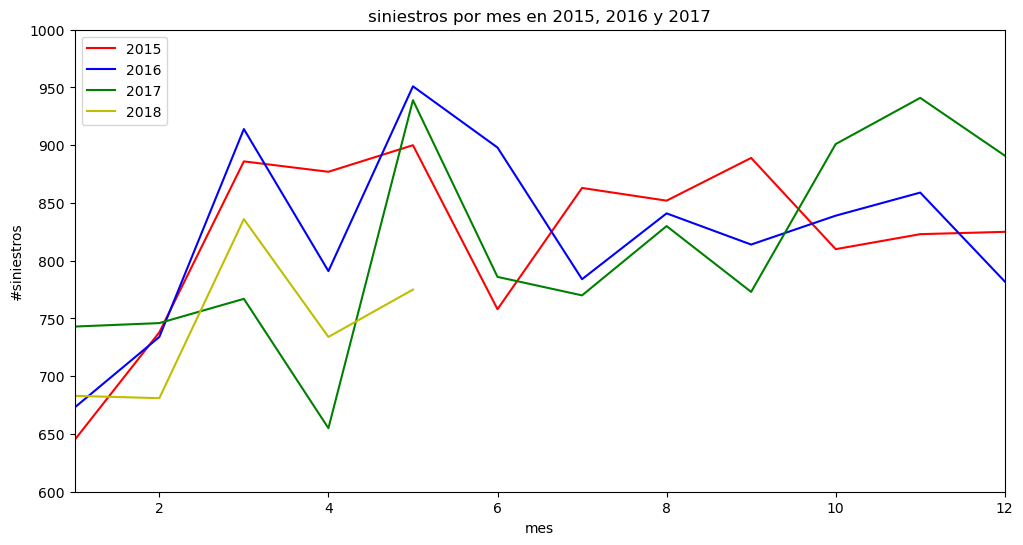

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(quince, label='2015', color='r')
ax.plot(diesiseis, label='2016', color='b')
ax.plot(diesisiete, label='2017', color='g')
ax.plot(diesiocho, label='2018', color='y')
ax.legend()
ax.set_ylim([600,1000])
ax.set_xlim([1,12])
ax.set_xlabel('mes')
ax.set_ylabel('#siniestros')
ax.set_title('siniestros por mes en 2015, 2016 y 2017')

En esta visualización veo que registro datos desde el mes 1 del año 2015 hasta el mes 5 del año 2018.

También puedo notar que hay una diferencia significativa entre los meses de verano en comparación al resto del año.